# TASK 1 - PREDICTION USING SUPERVISED MACHINE LEARNING

# To predict the percentage of a student based on the number of study hours

# -Bethu Medhini

In [30]:
# importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [31]:
# Reading the Dataset 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [32]:
# Checking if there are any null values in the Dataset
data.isnull == True

False

In [33]:
# finding the missing values in the data set.( Another way to check if any missing values)
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# There are no null values in the given dataset, this implies that we can proceed with the same. 

In [34]:
# Looking for number of rows and columns
data.shape

(25, 2)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


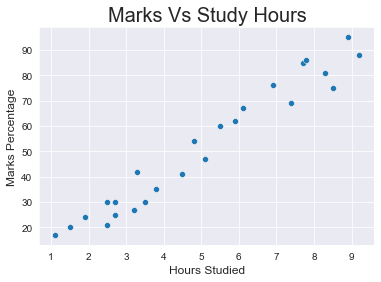

In [36]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Interpretation: From the above scatter plot, it can be observed that there is a correlation between marks percentage and hours studied. 

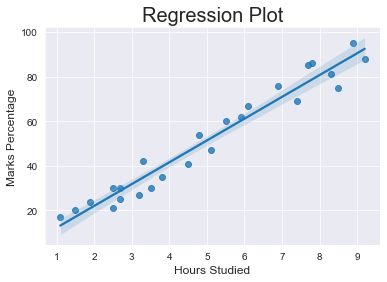

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [37]:
# Regression plot
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

# Interpretation: From the above regression plot it is observed that Marks percentage and Hours studied are positively correlated as the data points fall on or close to the regression line. Which means with increase in one variable, the other variable also increases. 

# TRAINING THE MODEL:

In [38]:
# Defining X and y 
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [40]:
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [41]:
# 2) fitting the data into the model
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


# PREDICTING THE PERCENTAGE OF MARKS

In [44]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours to be studied': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours to be studied,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the predicted marks with actual marks

In [46]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Lets see visualization on comparision of predicted marks and actual marks

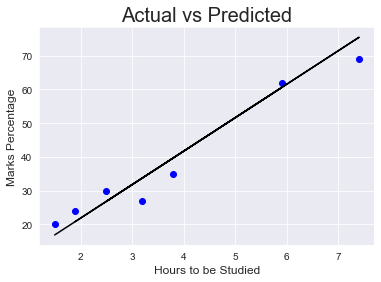

In [49]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours to be Studied', size=12)
plt.show()

# Evaluating the model

In [51]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


# Predicted value of a student if he/she studied for 9.25 hours/day

In [53]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# Interpretation: According to the above regression model, if a student studies for 9.25 hours per day, he/she may score 93.9 marks